## Our Objective :
Your mission is to design and implement an Information Retrieval (IR) system capable of efficiently
retrieving relevant documents from a given dataset. Below are the key steps and details for this project

## Importing Python Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Collection & Preparation 

In [2]:
Df = pd.read_csv('article.csv')
df = Df[['Category','Article text']]
df

,Category,Article text
0,news,"(CNN)Right now, there's a shortage of truck d..."
1,news,(CNN)Working in a factory or warehouse can me...
2,news,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,business,The pandemic thrust the working world into a n...
4,business,New York (CNN Business)March Madness isn't jus...
...,...,...
37944,sport,(CNN)Russian President Vladimir Putin has bee...
37945,news,"Lviv, Ukraine (CNN)A long line of men snakes o..."
37946,sport,(CNN)Major League Baseball (MLB) is postponin...
37947,news,Here's a look at the life of Mikhail Gorbachev...


## 2. Data Preprocessing

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Handling Missing Values If Any

In [4]:
df.isnull().sum()       # There is no Missing value or NaNs in our data

Category        0
Article text    9
dtype: int64

## Removing Puntuations from the Text Data

In [5]:
# Removing the Special Characters
def remove_special_characters(text):
    pattern = r'[^\w\s]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

#applying the function to the desired column
df['Article text'] = df['Article text'].apply(str).apply(remove_special_characters)

C:\Users\bb\AppData\Local\Temp\ipykernel_5832\1570952422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].apply(str).apply(remove_special_characters)


## Lowercasing of the Text Data

In [6]:
df['Article text'] = df['Article text'].str.lower()

C:\Users\bb\AppData\Local\Temp\ipykernel_5832\689987174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].str.lower()


## Tokenization of the Text Data

In [7]:
df['Article text'] = df['Article text'].apply(word_tokenize)

C:\Users\bb\AppData\Local\Temp\ipykernel_5832\1387184718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].apply(word_tokenize)


## Removing the StopWords From Text Data

In [8]:
# Loading the StopWords
stop_words = set(stopwords.words('english'))

# Creating a function to remove the StopWords from Text Data
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

# Applying the function to the text column in Dataframe
df['Article text'] = df['Article text'].apply(remove_stop_words)

C:\Users\bb\AppData\Local\Temp\ipykernel_5832\2145795239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].apply(remove_stop_words)


### Lemmatization of the Text Data

In [9]:
# Lemmatizing using WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

# Createing a Function to perform lemmatization
def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text ]

# Applying the function to the text column in the DataFrame
df['Article text'] = df['Article text'].apply(lemmatize_text)

C:\Users\bb\AppData\Local\Temp\ipykernel_5832\4208227525.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article text'] = df['Article text'].apply(lemmatize_text)


## Data View After Data Cleaning and Preprocessing

In [10]:
df

,Category,Article text
0,news,"[cnnright, there, shortage, truck, driver, u, ..."
1,news,"[cnnworking, factory, warehouse, mean, task, r..."
2,news,"[cnnin, hong, kong, warehouse, swarm, autonomo..."
3,business,"[pandemic, thrust, working, world, new, realit..."
4,business,"[new, york, cnn, businessmarch, madness, isnt,..."
...,...,...
37944,sport,"[cnnrussian, president, vladimir, putin, strip..."
37945,news,"[lviv, ukraine, cnna, long, line, men, snake, ..."
37946,sport,"[cnnmajor, league, baseball, mlb, postponing, ..."
37947,news,"[here, look, life, mikhail, gorbachev, former,..."


## Exploratory Data Analysis of Article's  Text Data

In [11]:
from wordcloud import WordCloud
from collections import Counter

## Analysis of Categories of Text Data

[Text(0.5, 1.0, 'Categories of Articles In Text Sentiment DataSet')]

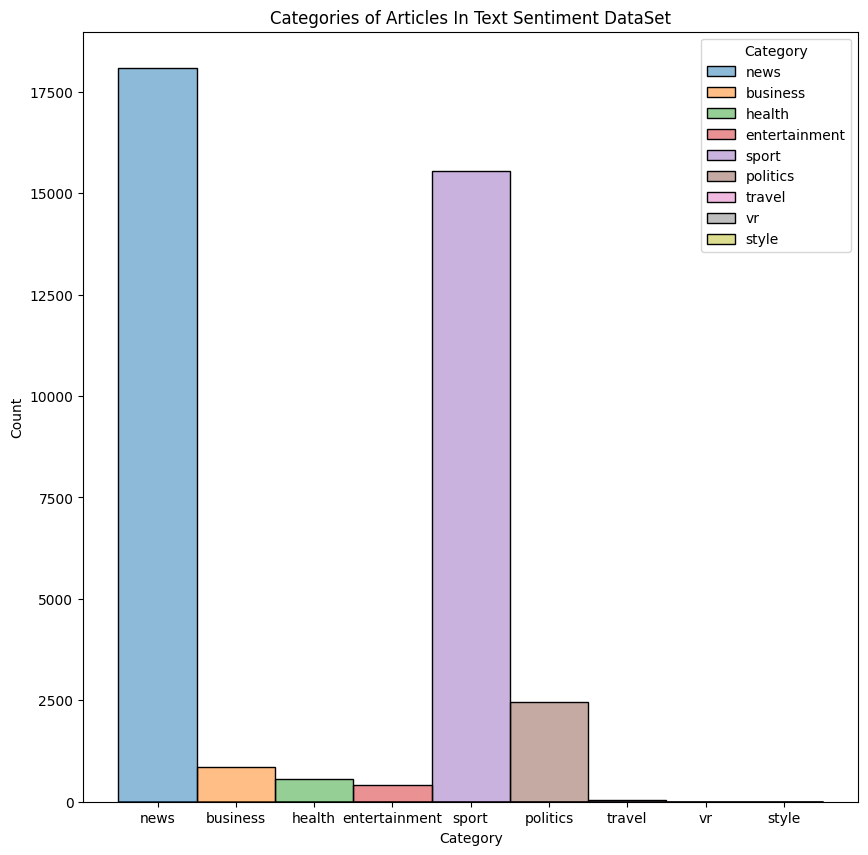

In [12]:
# Visualising the Sentiment Data
plt.figure(figsize=(10, 10))
sns.histplot(data = df, x = df['Category'], hue = 'Category').set(title=f'Categories of Articles In Text Sentiment DataSet')

## The above Visualise Histogram helps us in knowing about meaningful insights regarding the Artical Text Data :

1. News is the most occured Artical Category in dataset.
2. The 2nd most used Artical Category is Sports.
3. Politics is the 3rd most lying Artical category.
4. Business, Health, Entertainment, Travel, Style and vr are other Article Categories Lying in Data

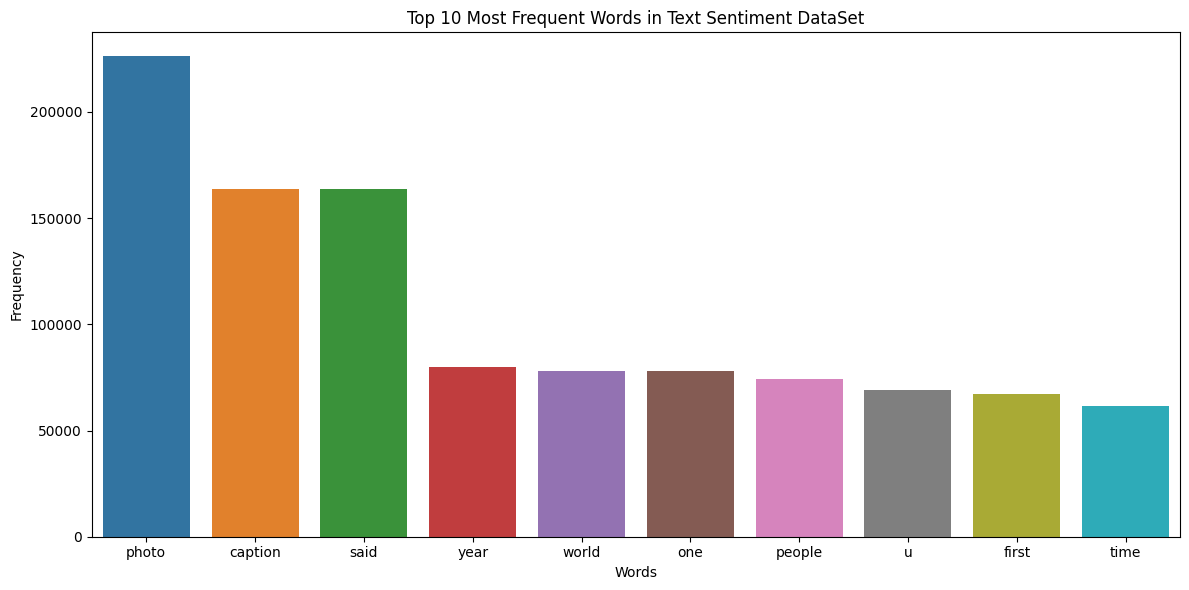

In [13]:
# Combining the Text data for analysis
combine_text =''.join([' '.join(text_list) for text_list in df['Article text']])

# Calculate word frequencies
words = combine_text.split()
word_freq = Counter(words)

# Coverting word frequecies into DataFrame for Visualizations 
word_freq = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
p = word_freq.sort_values(by='Frequency',ascending=False)
Word=p['Word']
frequency=p['Frequency']

# Create a bar plot of word frequencies
plt.figure(figsize=(12,6))
sns.barplot(x=(Word.head(10)), y=(frequency.head(10))).set(title=f'Top 10 Most Frequent Words in Text Sentiment DataSet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) of textual Articles  data by Visualization Through WordCloud

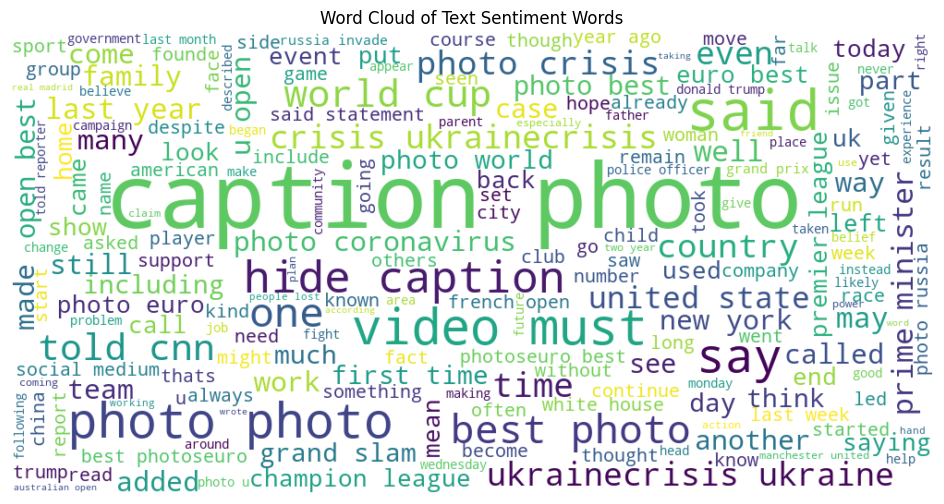

In [14]:
# Generating Word Cloud
wordcloud = WordCloud(width=1000, height=500,background_color='white').generate(' '.join(words))

# Visualization of Words using matplotlib in Word Cloud form
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Sentiment Words")
plt.show()

## User Query Interface

In [15]:
# Creating a preprocessing function for User Query Interface
stops_word = set(stopwords.words("english")) ## Will contain stops words

def preprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text ,flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s\n]','',text)
    
    lemitizer = WordNetLemmatizer()  ## this function converts the word to its base form
    words = word_tokenize(text) ## split the sentence into words/tokens
    lemitize_word = [lemitizer.lemmatize(word ,wordnet.VERB) for word in words]
    newArray = [stop_word for stop_word in lemitize_word if stop_word not in stops_word]
    
    return " ".join(newArray)

In [ ]:
## create a input query function

def query():
    query = input("Write the query(Text) :\n ")
    
    query1 = preprocessing(query)
    
    print("\nThe query after preprocessing: \n" ,query1)
    
    return query1

## Implement the Term Frequency-Inverse Document Frequency (TF-IDF) as Feature Engineering of Artical Text Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# Create a TF-IDF vectorizer
tf = TfidfVectorizer()

# Fit the vectorizer on Article text data column
tfidf_matrix = tf.fit_transform(data_df['Article text'])

# Transform the preprocessed query using the TF-IDF vectorizer
query_vector = tf.transform([query1])
    
# Calculate cosine similarities between query vector and document vectors
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
        
# Get document indices sorted by similarity
ranked_indices = cosine_similarities.argsort()[0][::-1]
    
# Print top relevant documents
print("\nTop relevant documents:")
for idx in ranked_indices[:5]:  # Print the top 5 documents
print(f"Document: {df['Article text'][idx][:100]}...")  # Print the first 100 characters
print(f"Label: {df['Section'][idx]}")
print()

## Model Selection Training and Evolution

In [ ]:
Evaluation:
# # Define test queries and their relevant documents
# test_queries = {
#     "asia": [
#         "(CNN)In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.The Autonomous Mobile Robots were developed by Chinese startup Geek+. As they move around the warehouse they're guided by QR codes on the floor, and using AI they are able to make their own decisions, including what direction to travel and what route to take to their destination.  Photos: The robots running our warehousesRobots are an increasingly familiar presence in warehouses. At the south-east London warehouse run by British online supermarket Ocado, 3,000 robots fulfill shopping orders. When an order is sent to the warehouse, the bots spring to life and head towards the container they require. Scroll through to see more robots that are revolutionizing warehouses.Hide Caption 1 of 8 Photos: The robots running our warehousesIn response to the coronavirus pandemic, MIT collaborated with Ava Robotics and the Greater Boston Food Bank to de"
#     ],
#     "media": [
#         "(CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set "
#     ]
#  }

# Define test queries and their relevant documents
test_queries = {
    "asia": [
        "Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically been part of Russia, but it's Ukrainian nowA lot of ethnic Russians live there, but so do Ukrainians and Tatars who are anti-RussianPart of the Russian Navy is based in CrimeaJust when it looked like Ukraine was settling down after toppling pro-Russian President Viktor Yanukovych over the weekend, te..."
    ],
    "media": [
        "(CNN)Chelsea captain Cesar Azpilicueta says footballers are ready and waiting to take part in another social media boycott if companies don't clamp down on abuse on their platforms.Earlier this year, players, clubs in the Premier League, English Football League, Women's Super League and Women's Championship, along with the game's governing bodies and organizations such as Kick It Out, turned of..."
    ]
 }


# Initialize evaluation metrics
total_queries = len(test_queries)
total_precision = 0
total_recall = 0

# User query interface
for query, relevant_docs in test_queries.items():
    print("\nQuery:", query)
    
    # Preprocess the query
    preprocessed_query = preprocess_text(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("Top relevant documents:")
    for idx in ranked_indices[:5]:  # Print the top 5 documents
        print(f"Document: {data_df['Article text'][idx][:400]}...")  # Print the first 100 characters
        print(f"Label: {data_df['Section'][idx]}")
        print()
        
    # Calculate evaluation metrics
    retrieved_docs = [data_df['Article text'][idx] for idx in ranked_indices[:5]]  # Top 5 retrieved documents
    true_positives = len(set(retrieved_docs) & set(relevant_docs))
    
    precision = true_positives / len(retrieved_docs)
    recall = true_positives / len(relevant_docs)
    
    total_precision += precision
    total_recall += recall
    
    print("Precision:", precision)
    print("Recall:", recall)
    print()

# Calculate average precision and recall
average_precision = total_precision / total_queries
average_recall = total_recall / total_queries

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)